In [14]:
import yfinance as yf
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt

### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [15]:
tsla = yf.Ticker("TSLA")

In [23]:
tsla_data = tsla.history(period="max")

In [24]:
tsla_data.reset_index(inplace=True)
tsla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [25]:
url = " https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [26]:
soup = BeautifulSoup(html_data,"html5lib")

In [ ]:
tables = soup.find_all('table')
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
Tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        Tesla_revenue = Tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [ ]:
Tesla_revenue = Tesla_revenue[Tesla_revenue['Revenue'] != ""]
Tesla_revenue

In [88]:
Tesla_revenue.tail()

,Date,Revenue,Revenue1
50,2010-09-30,31,31
51,2010-06-30,28,28
52,2010-03-31,21,21
54,2009-09-30,46,46
55,2009-06-30,27,27


### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [29]:
gme = yf.Ticker("GME")

In [30]:
gme_data = gme.history(period="max")

In [31]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [ ]:
url2 = " https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data,"html5lib")

In [ ]:
tables = soup.find_all('table')
for index,table in enumerate(tables):
    if ("Gamestop Quarterly Revenue" in str(table)):
        table_index = index
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [ ]:
gme_revenue = gme_revenue[gme_revenue['Revenue'] !=""]
gme_revenue

In [89]:
gme_revenue.tail()

,Date,Revenue,Character_Count,Revenue1
50,2010-09-30,31,2,31
51,2010-06-30,28,2,28
52,2010-03-31,21,2,21
54,2009-09-30,46,2,46
55,2009-06-30,27,2,27


### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [84]:
Tesla_revenue['Revenue1'] = Tesla_revenue['Revenue'].astype(int)

In [86]:
Tesla_revenue['Date'] = pd.to_datetime(Tesla_revenue['Date'])

Text(0, 0.5, 'Stock Price')

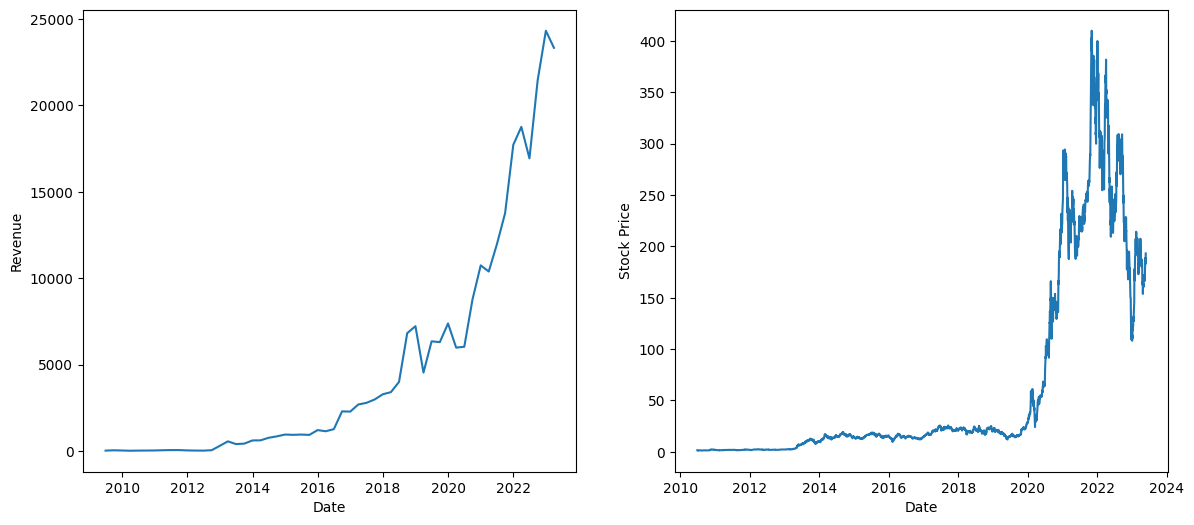

In [87]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)

plt.plot(Tesla_revenue['Date'], Tesla_revenue['Revenue1'])
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.subplot(1, 2, 2)
plt.plot(tsla_data['Date'], tsla_data['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')


### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

In [66]:
gme_revenue['Revenue1'] = gme_revenue['Revenue'].astype(int)

In [ ]:
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

Text(0, 0.5, 'Stock Price')

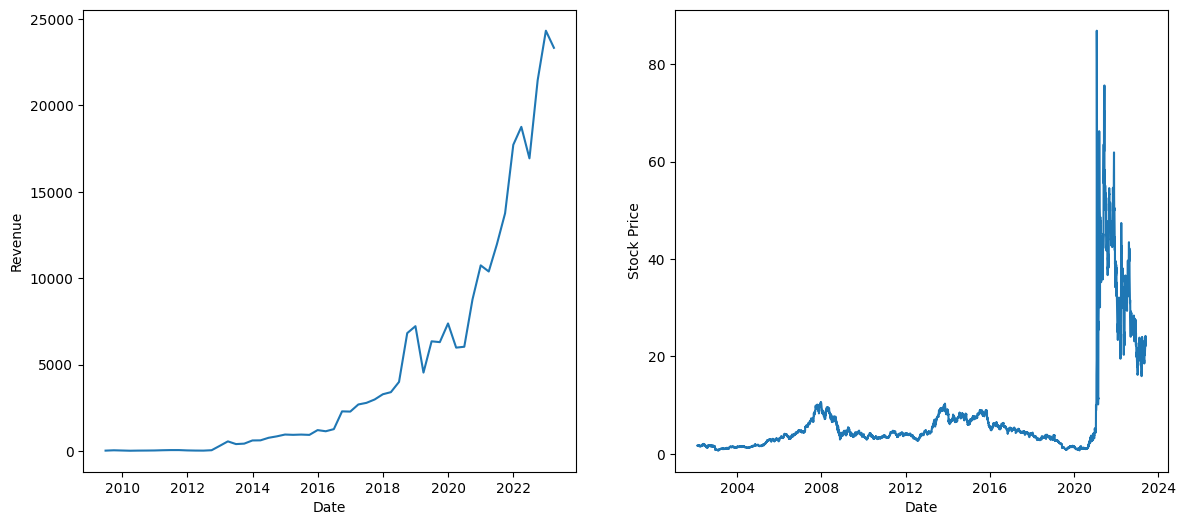

In [83]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)

plt.plot(gme_revenue['Date'], gme_revenue['Revenue1'])
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.subplot(1, 2, 2)
plt.plot(gme_data['Date'], gme_data['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')


### Question 7 - Sharing your Assignment Notebook - 2 Points